# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [51]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [53]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,536,102,55,101,213,67,12,222,30,25,177,226,719,213,71,2,21,187,199
1,576,109,53,103,210,63,11,219,30,25,172,229,707,212,71,6,3,188,199
2,377,87,37,60,132,57,6,128,52,18,129,154,243,132,71,1,14,186,192
3,140,90,37,80,171,58,9,157,42,20,132,172,373,115,60,3,18,201,209
4,250,95,38,66,126,52,8,133,52,18,140,158,253,140,78,11,8,184,183
5,141,81,42,63,125,55,8,149,46,19,145,166,320,172,86,7,7,179,182
6,53,101,42,62,175,67,6,149,43,19,139,169,341,165,65,7,11,202,209
7,76,91,39,83,170,60,8,172,38,21,134,197,445,152,72,0,10,188,194
8,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
9,154,89,40,79,154,64,9,144,46,19,139,168,311,149,71,8,7,188,197


Methods `describe` and `info` deliver some useful information.

In [54]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.876138,93.857923,44.812386,82.209472,169.205829,61.633880,8.553734,169.194900,40.816029,20.615665,148.065574,188.706740,441.79235,174.085610,72.165756,6.386157,12.666667,189.140255,195.974499
std,245.969190,8.224154,6.141827,15.895583,32.794364,7.315044,4.088364,33.207107,7.754728,2.596286,14.508973,30.874179,176.59575,32.294408,7.265798,4.921303,8.903579,6.167995,7.462759
min,0.000000,73.000000,34.000000,42.000000,105.000000,48.000000,3.000000,114.000000,26.000000,17.000000,119.000000,131.000000,191.00000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,318.00000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,423.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.00000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,646.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,597.00000,196.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.00000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [55]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [56]:
# First, let's deal with the data itself. We can see from calling describe() that some properties have disproportionately big numerical values.
# Therefore, a standardisation is to be performed
#
# However, to avoid calling the StandardScaler from sklearn.preprocessing, we will use Pipeline from sklearn.pipeline when training our model
# to perform the standardisation. This allows us to move the responsibility to sklearn which is well-tested and avoid bugs

In [57]:
# Now, let's move on to the labels
# First, let's check that the classes are balanced

from collections import Counter

Counter(y_train).most_common()

# Conclusion: the classes are OK, no need to filter data

[('saab', 144), ('bus', 139), ('opel', 137), ('van', 129)]

In [58]:
# Now let's transform classes from strings to integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Check that the results contain integers from 0 to 3 (because, as we have seen in the previous cell, we have four classes)
y_train[:10]

array([2, 2, 2, 2, 3, 0, 0, 2, 0, 3])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [77]:
from sklearn.preprocessing import StandardScaler
# Logistic regression is without cross validation, because we use GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc


# Decompose these steps to functions for further reuse

def get_scores(trained):
    predicted = trained.predict(X_test)
    return accuracy_score(y_test, predicted), f1_score(y_test, predicted, average='weighted')


def do_plot_roc(trained):
    predicted_proba = trained.predict_proba(X_test)
    plot_roc(y_test, predicted_proba)

    classes_legend = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
    print(f'Legend: {classes_legend}')


def score_with_cross_validation(pipeline, grid):
    pipelineCV = GridSearchCV(pipeline, grid, refit=True)
    pipelineCV.fit(X_train, y_train)

    accuracy, f1 = get_scores(pipelineCV.best_estimator_)

    print(f'accuracy: {accuracy}')
    print(f"f1:       {f1}")

    do_plot_roc(pipelineCV.best_estimator_)

accuracy: 0.8181818181818182
f1:       0.8159281295103806
Legend: {0: 'bus', 1: 'opel', 2: 'saab', 3: 'van'}


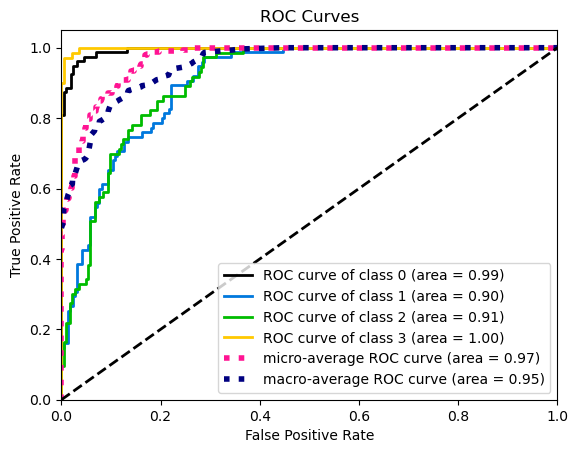

In [60]:
# The parameters grid for logistic regression is logarithmic
logreg_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

logreg_pipeline = make_pipeline(StandardScaler(),
                                LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
score_with_cross_validation(logreg_pipeline, logreg_grid)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot.

Text(0.5, 0, 'Number of features')

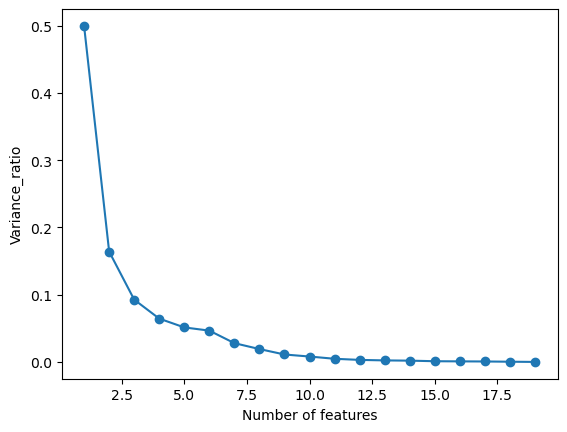

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_pipeline = make_pipeline(StandardScaler(),
                             PCA())

pca_pipeline.fit(X_train)

explained_variance_ratio = pca_pipeline['pca'].explained_variance_ratio_

x_values = np.linspace(1, len(explained_variance_ratio), len(explained_variance_ratio))

plt.plot(x_values, explained_variance_ratio)
plt.scatter(x_values, explained_variance_ratio)
plt.ylabel("Variance_ratio")
plt.xlabel("Number of features")

#### 2.3. PCA transformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [62]:
# We want to disregard some of the last components
# To do that, we need to decide how much information we want to be saved
# The "amount of information that is saved" is calculated by dividing the sum of the first k variances
# to the overall sum of variances, because that is exactly the measure of the complexity of data

must_save = 0.995

n_save = 1
while True:
    if sum(explained_variance_ratio[:n_save]) / sum(explained_variance_ratio) > must_save:
        break

    n_save += 1

# See how many components remained
n_save

# We can see that we have disregarded roughly the third of all components, which is good enough

13

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

accuracy: 0.7609427609427609
f1:       0.7575155052867939
Legend: {0: 'bus', 1: 'opel', 2: 'saab', 3: 'van'}


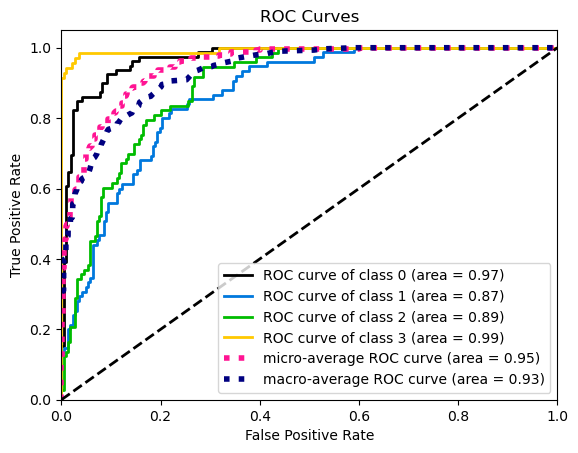

In [63]:
pca_logreg_pipeline = make_pipeline(StandardScaler(),
                                    PCA(n_components=n_save),
                                    LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,
                                                       max_iter=500))

score_with_cross_validation(pca_logreg_pipeline, logreg_grid)

#### 2.5. Decision tree
* Now train a decision tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

accuracy: 0.7070707070707071
f1:       0.6986811777969091
Legend: {0: 'bus', 1: 'opel', 2: 'saab', 3: 'van'}


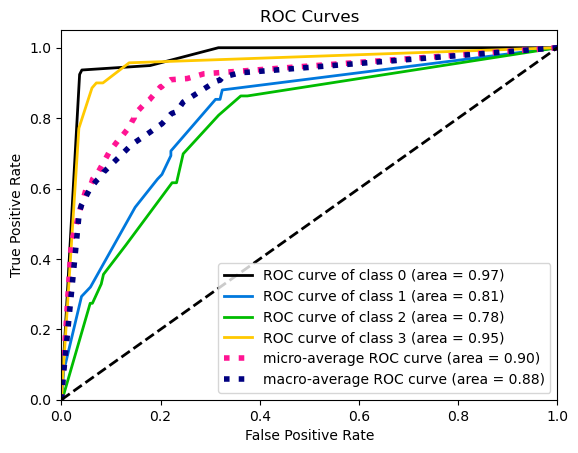

In [64]:
from sklearn.tree import DecisionTreeClassifier

# The parameters grid for decision tree is linear
decision_tree_grid = {'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

decision_tree_pipeline = make_pipeline(StandardScaler(),
                                       DecisionTreeClassifier())

score_with_cross_validation(decision_tree_pipeline, decision_tree_grid)

#### 2.6. Bagging.

Here starts the ensemble part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensemble varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this task. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from random import randint
from tqdm import tqdm

N_min = 2
N_max = 100

n_range = range(N_min, N_max, 5)

decision_tree_grid['decisiontreeclassifier__min_samples_split'] = [2, 10, 20]

logreg_accuracies = []
logreg_f1s = []
decision_tree_accuracies = []
decision_tree_f1s = []

for n in tqdm(n_range):
    logreg_bagging = BaggingClassifier(GridSearchCV(logreg_pipeline, logreg_grid, refit=True),
                                       n_estimators=n,
                                       max_samples=randint(1, X_train.shape[0] - 1))
    logreg_bagging.fit(X_train, y_train)

    logreg_accuracy, logreg_f1 = get_scores(logreg_bagging)
    logreg_accuracies.append(logreg_accuracy)
    logreg_f1s.append(logreg_f1)

    decision_tree_bagging = BaggingClassifier(GridSearchCV(decision_tree_pipeline, decision_tree_grid, refit=True),
                                              n_estimators=n,
                                              max_samples=randint(100, X_train.shape[0] - 1))
    decision_tree_bagging.fit(X_train, y_train)

    decision_tree_accuracy, decision_tree_f1 = get_scores(decision_tree_bagging)
    decision_tree_accuracies.append(decision_tree_accuracy)
    decision_tree_f1s.append(decision_tree_f1)

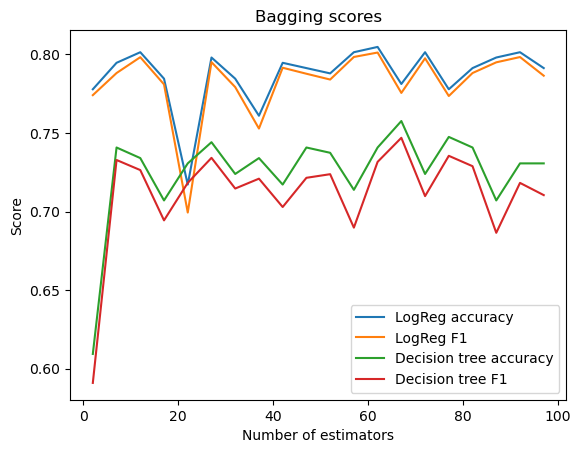

In [348]:
plt.plot(n_range, logreg_accuracies, label='LogReg accuracy')
plt.plot(n_range, logreg_f1s, label='LogReg F1')
plt.plot(n_range, decision_tree_accuracies, label='Decision tree accuracy')
plt.plot(n_range, decision_tree_f1s, label='Decision tree F1')
plt.title("Bagging scores")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()

We can clearly see that starting from approximately 9-10 classifiers the increase in the number of decision trees
does not result in the scores increase. For the logistic regression it is even more dramatic:
its score does not at all depend on whether we use just one or two estimators or significantly more.

The former can be explained by the fact that as we have seen in the beginning of this assignment, we have 549 samples in the train set,
which is exactly between the 9-th and the 10-th powers of 2, which means that enough trees, which contain enough branches for all the train samples to
be processed separately, the precision of the decision trees simply cannot get any better: the samples are atomic, there is no branching from there.

The explanation for the latter is also lies in the "nature" of the logistic regression: unlike decision trees, it simply adjusts some weights and
predicts the scores by them, which makes it more or less deterministic, so the only source of random is the initial subset of the train data that the
specific estimator receives. Because our data seems to be "good" (i.e. not containing too many outliers), the logistic regression estimators
in the ensemble merely perform the same steps as all the other ones, thus redoing the same work over and over again, which cannot yield any score
improvements.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_accuracies = []
random_forest_f1s = []

for n in tqdm(n_range):
    random_forest_pipeline = make_pipeline(StandardScaler(),
                                           RandomForestClassifier(n_estimators=n))

    random_forest_pipeline.fit(X_train, y_train)

    random_forest_accuracy, random_forest_f1 = get_scores(random_forest_pipeline)

    random_forest_accuracies.append(random_forest_accuracy)
    random_forest_f1s.append(random_forest_f1)

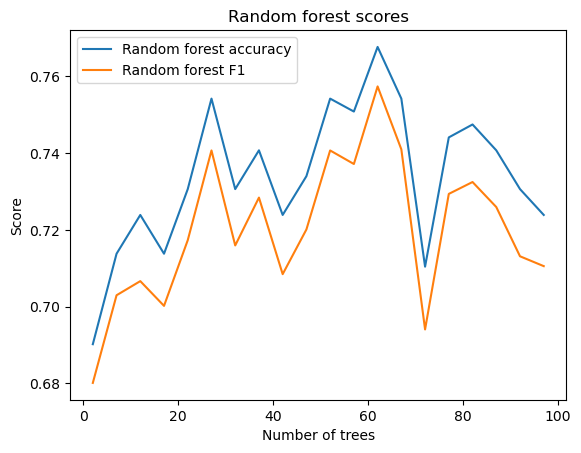

In [74]:
plt.plot(n_range, random_forest_accuracies, label='Random forest accuracy')
plt.plot(n_range, random_forest_f1s, label='Random forest F1')
plt.title("Random forest scores")
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.legend()
plt.show()

The results are expectedly very similar to those which we got when we used bagging of decision trees,
because a random forest basically $\textit{is}$ a bagging of decision trees

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Decision Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size).

* Analyse the final plot. Can you make any conclusions using it?

In [75]:
# First, let us check that if we simply choose the first 1/10, 1/5, ... 9/10 of the train set, the classes will still be balanced

train_sizes = [int(X_train.shape[0] / 10 * i) for i in range(1, 11)]
for _, size in enumerate(train_sizes):
    print(Counter(y_train[:size - 1]).most_common())

# We can see that classes are more or less balanced in all cases

[(3, 15), (2, 14), (0, 14), (1, 10)]
[(2, 31), (1, 28), (3, 25), (0, 24)]
[(2, 47), (0, 41), (1, 39), (3, 36)]
[(0, 56), (1, 56), (2, 55), (3, 51)]
[(1, 73), (0, 72), (2, 69), (3, 59)]
[(1, 88), (0, 86), (2, 80), (3, 74)]
[(0, 104), (1, 100), (2, 92), (3, 87)]
[(0, 115), (1, 111), (2, 109), (3, 103)]
[(2, 130), (0, 128), (1, 120), (3, 115)]
[(2, 144), (0, 139), (1, 136), (3, 129)]


In [ ]:
logreg_accuracies = []
logreg_f1s = []
decision_tree_accuracies = []
decision_tree_f1s = []
random_forest_accuracies = []
random_forest_f1s = []

for _, size in tqdm(enumerate(train_sizes)):
    curr_X_train, curr_y_train = X_train[:size], y_train[:size]

    logreg_pipelineCV = GridSearchCV(logreg_pipeline, logreg_grid, refit=True)
    logreg_pipelineCV.fit(curr_X_train, curr_y_train)
    logreg_accuracy, logreg_f1 = get_scores(logreg_pipelineCV.best_estimator_)

    logreg_accuracies.append(logreg_accuracy)
    logreg_f1s.append(logreg_f1)

    decision_tree_pipelineCV = GridSearchCV(decision_tree_pipeline, decision_tree_grid, refit=True)
    decision_tree_pipelineCV.fit(curr_X_train, curr_y_train)
    decision_tree_accuracy, decision_tree_f1 = get_scores(decision_tree_pipelineCV.best_estimator_)

    decision_tree_accuracies.append(decision_tree_accuracy)
    decision_tree_f1s.append(decision_tree_f1)

    random_forest_pipeline = make_pipeline(StandardScaler(),
                                           RandomForestClassifier())
    random_forest_pipeline.fit(curr_X_train, curr_y_train)
    random_forest_accuracy, random_forest_f1 = get_scores(random_forest_pipeline)

    random_forest_accuracies.append(random_forest_accuracy)
    random_forest_f1s.append(random_forest_f1)

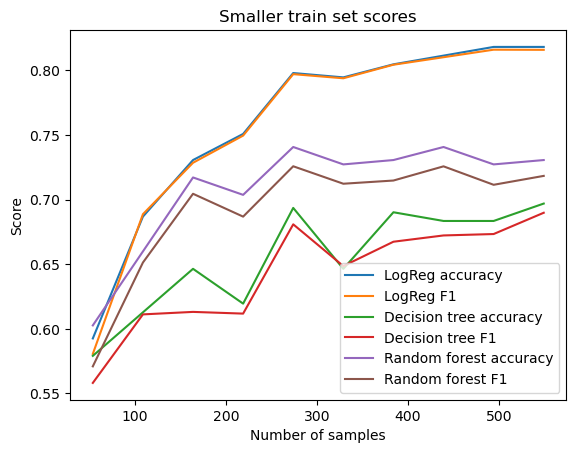

In [79]:
plt.plot(train_sizes, logreg_accuracies, label='LogReg accuracy')
plt.plot(train_sizes, logreg_f1s, label='LogReg F1')
plt.plot(train_sizes, decision_tree_accuracies, label='Decision tree accuracy')
plt.plot(train_sizes, decision_tree_f1s, label='Decision tree F1')
plt.plot(train_sizes, random_forest_accuracies, label='Random forest accuracy')
plt.plot(train_sizes, random_forest_f1s, label='Random forest F1')
plt.title("Smaller train set scores")
plt.xlabel("Number of samples")
plt.ylabel("Score")
plt.legend()
plt.show()